In [ ]:
C:\Users\ricky\Downloads>curl -X POST "http://localhost:8000/pose" -F "file=@demo.jpg" 如何在colab上模擬這件事情

In [23]:
import requests
url = "https://0855-118-166-89-219.ngrok-free.app/pose"
file_path = "/content/demo.jpg"
with open(file_path, "rb") as f:
    files = {'file': ('demo.jpg', f, 'image/jpeg')}
    response = requests.post(url, files=files)
print(response.status_code)
print(response.json())
print(response.json()['predictions'][0][0])

200
{'predictions': [[{'keypoints': [[693.7362060546875, 156.47781372070312], [683.406494140625, 140.98316955566406], [667.911865234375, 146.14805603027344], [608.5157470703125, 166.8075714111328], [624.0103759765625, 174.5548858642578], [546.5372314453125, 264.94024658203125], [711.8132934570312, 277.8524475097656], [435.4923095703125, 254.61050415039062], [701.4835815429688, 394.0622253417969], [399.3381652832031, 125.48854064941406], [732.4728393554688, 443.1285705566406], [567.1967163085938, 543.8436889648438], [613.6806030273438, 541.26123046875], [463.899169921875, 678.1305541992188], [778.9567260742188, 631.6466064453125], [285.7108459472656, 753.021240234375], [840.9352416992188, 838.2417602539062]], 'keypoint_scores': [0.7784907817840576, 0.7048039436340332, 0.7633109092712402, 0.4956587255001068, 0.6797255277633667, 0.5693095326423645, 0.5640244483947754, 0.6629411578178406, 0.5662106275558472, 0.801803469657898, 0.487191379070282, 0.6105688810348511, 0.6073668003082275, 0.63

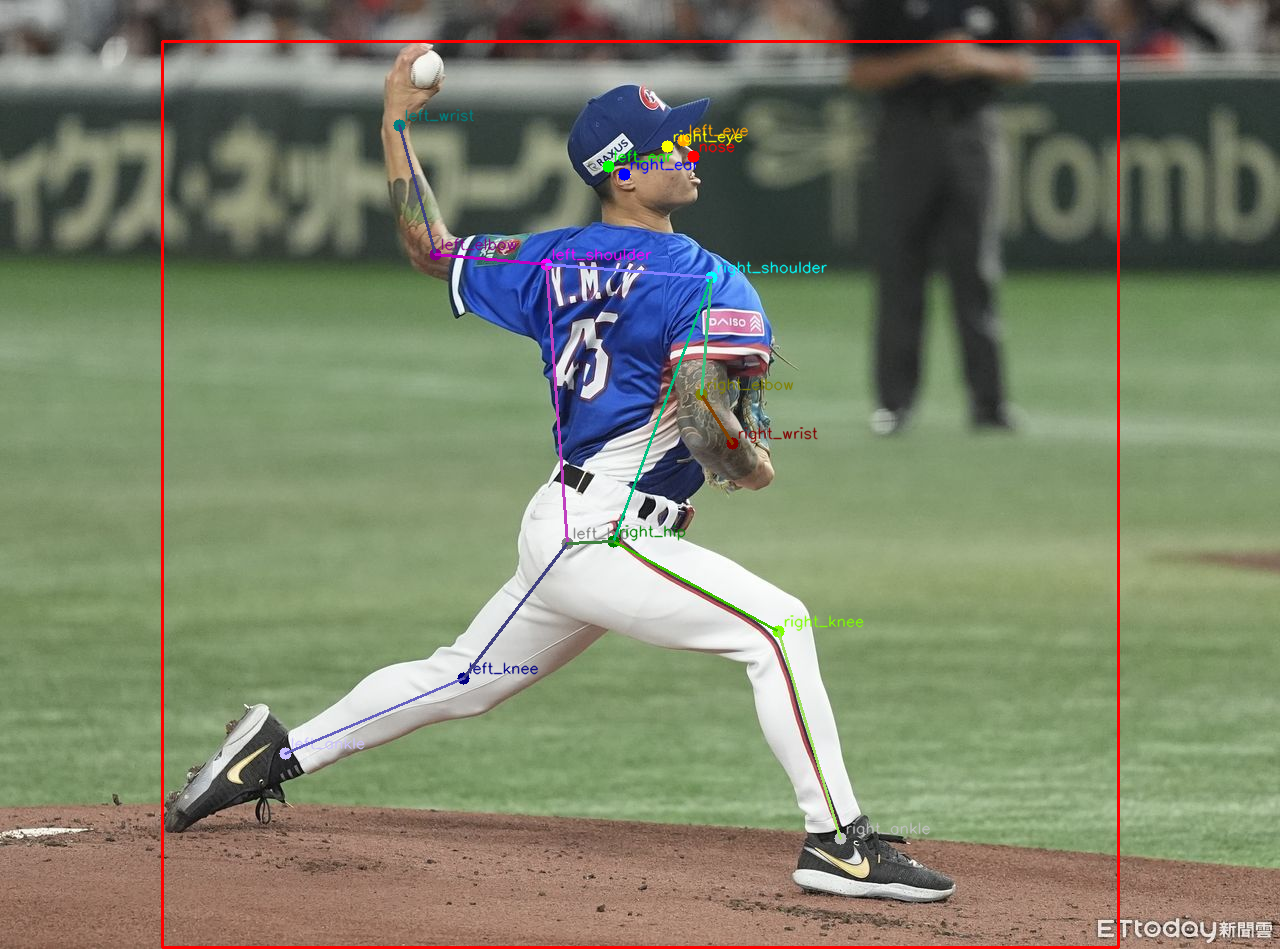

In [29]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 你的結果
result_dict = response.json()['predictions'][0][0]
img = cv2.imread('/content/demo.jpg')

keypoints = result_dict['keypoints']
scores = result_dict['keypoint_scores']

threshold = 0.3

# COCO 17點名稱（依模型調整）
keypoint_names = [
    "nose", "left_eye", "right_eye", "left_ear", "right_ear",
    "left_shoulder", "right_shoulder", "left_elbow", "right_elbow",
    "left_wrist", "right_wrist", "left_hip", "right_hip",
    "left_knee", "right_knee", "left_ankle", "right_ankle"
]

# 為每個點設定一個顏色（BGR）
colors = [
    (0, 0, 255),      # nose - 紅
    (0, 165, 255),    # left_eye - 橙
    (0, 255, 255),    # right_eye - 黃
    (0, 255, 0),      # left_ear - 綠
    (255, 0, 0),      # right_ear - 藍
    (255, 0, 255),    # left_shoulder - 紫
    (255, 255, 0),    # right_shoulder - 淺藍
    (128, 0, 128),    # left_elbow - 深紫
    (0, 128, 128),    # right_elbow - 深青
    (128, 128, 0),    # left_wrist - 橄欖綠
    (0, 0, 128),      # right_wrist - 深藍
    (128, 128, 128),  # left_hip - 灰
    (0, 128, 0),      # right_hip - 深綠
    (128, 0, 0),      # left_knee - 深紅
    (0, 255, 127),    # right_knee - 春綠
    (255, 192, 203),  # left_ankle - 粉紅
    (192, 192, 192)   # right_ankle - 銀
]
# 畫關鍵點及標籤
for i, (x, y) in enumerate(keypoints):
    if scores[i] > threshold:
        color = colors[i % len(colors)]
        cv2.circle(img, (int(x), int(y)), 6, color, -1)
        cv2.putText(img, keypoint_names[i], (int(x)+5, int(y)-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1, cv2.LINE_AA)

# 骨架連線(同前面)
skeleton = [
    # 左側: wrist → elbow → shoulder → hip → knee → ankle
    (9, 7), (7, 5), (5, 11), (11, 13), (13, 15),
    # 右側: wrist → elbow → shoulder → hip → knee → ankle
    (10, 8), (8, 6), (6, 12), (12, 14), (14, 16),
    # 左右肩膀與左右髖部連線
    (5, 6), (11, 12)
]

for pt1, pt2 in skeleton:
    if scores[pt1] > threshold and scores[pt2] > threshold:
        x1, y1 = keypoints[pt1]
        x2, y2 = keypoints[pt2]
        # 用連接點的顏色平均值作為線的顏色
        c1 = np.array(colors[pt1])
        c2 = np.array(colors[pt2])
        line_color = tuple(((c1 + c2) // 2).astype(int).tolist())
        cv2.line(img, (int(x1), int(y1)), (int(x2), int(y2)), line_color, 2)

# 畫bbox
bbox = result_dict['bbox'][0]
x, y, w, h = map(int, bbox)
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# 1.載入影片.mp4
# 2.逐偵讀取後做成jpg發給api做推論result = img2result(img)
# 3.取得推論
# 4.根據推論繪製圖片
# 5.顯示圖片

# img2result函數

In [37]:
import requests

url = "https://0855-118-166-89-219.ngrok-free.app/pose"
file_path = "/content/demo.jpg"

def img2result(file_path,url):
  with open(file_path, "rb") as f:
    files = {'file': ('demo.jpg', f, 'image/jpeg')}
    response = requests.post(url, files=files)
    return response.json()['predictions'][0][0]

# result2img函數

In [38]:
import cv2
import numpy as np

def result2img(result: dict, img: np.ndarray) -> np.ndarray:
    keypoints = result['keypoints']
    scores = result['keypoint_scores']
    bbox = result['bbox'][0]

    threshold = 0.3

    keypoint_names = [
        "nose", "left_eye", "right_eye", "left_ear", "right_ear",
        "left_shoulder", "right_shoulder", "left_elbow", "right_elbow",
        "left_wrist", "right_wrist", "left_hip", "right_hip",
        "left_knee", "right_knee", "left_ankle", "right_ankle"
    ]

    colors = [
        (0, 0, 255), (0, 165, 255), (0, 255, 255), (0, 255, 0), (255, 0, 0),
        (255, 0, 255), (255, 255, 0), (128, 0, 128), (0, 128, 128), (128, 128, 0),
        (0, 0, 128), (128, 128, 128), (0, 128, 0), (128, 0, 0), (0, 255, 127),
        (255, 192, 203), (192, 192, 192)
    ]

    skeleton = [
        (9, 7), (7, 5), (5, 11), (11, 13), (13, 15),
        (10, 8), (8, 6), (6, 12), (12, 14), (14, 16),
        (5, 6), (11, 12)
    ]

    # 畫 keypoints 和 label
    for i, (x, y) in enumerate(keypoints):
        if scores[i] > threshold:
            color = colors[i % len(colors)]
            cv2.circle(img, (int(x), int(y)), 6, color, -1)
            cv2.putText(img, keypoint_names[i], (int(x) + 5, int(y) - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1, cv2.LINE_AA)

    # 畫骨架連線
    for pt1, pt2 in skeleton:
        if scores[pt1] > threshold and scores[pt2] > threshold:
            x1, y1 = keypoints[pt1]
            x2, y2 = keypoints[pt2]
            c1 = np.array(colors[pt1])
            c2 = np.array(colors[pt2])
            line_color = tuple(((c1 + c2) // 2).astype(int).tolist())
            cv2.line(img, (int(x1), int(y1)), (int(x2), int(y2)), line_color, 2)

    # 畫 bounding box
    x, y, w, h = map(int, bbox)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

    return img


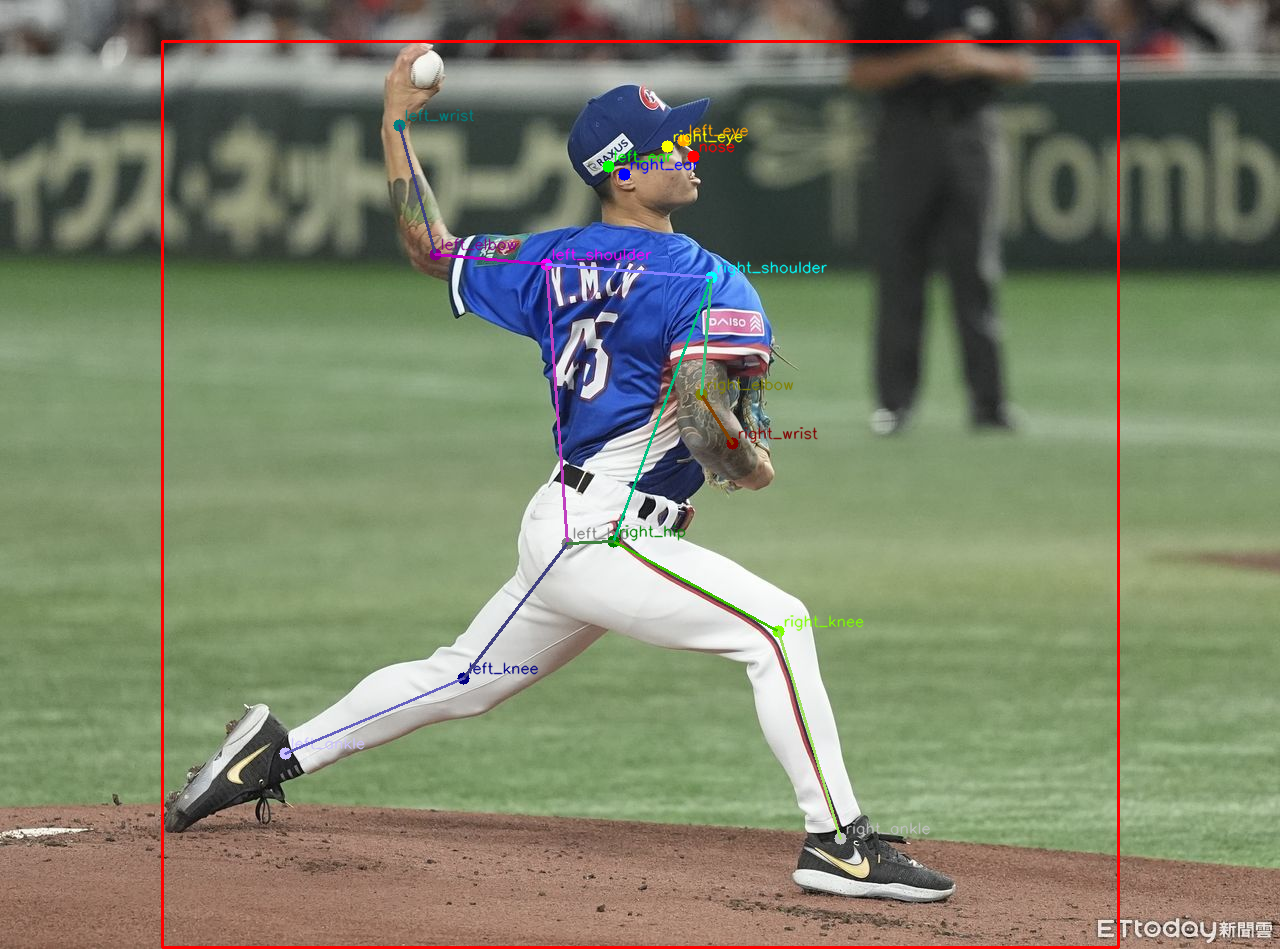

In [39]:
url = "https://0855-118-166-89-219.ngrok-free.app/pose"
file_path = "/content/demo.jpg"
img = cv2.imread(file_path)
result_dict = img2result(file_path,url)
plot_img = result2img(result_dict, img.copy())
cv2_imshow(plot_img)
# 這是我的程式 可以將單張圖片.jpg發給遠端url取得骨架座標result_dict再呼叫result2img繪製成plot_img最後用cv2_imshow顯示出來
# 現在我想應用在影片上 我希望輸入一個mp4檔案路徑 能夠得到一個渲染過骨架版本的gif圖 以及每偵的result_dict

In [42]:
import cv2
import requests
import numpy as np
from PIL import Image
from tqdm import tqdm
import io

def img2result(image_path, url):
    with open(image_path, "rb") as f:
        files = {'file': (image_path, f, 'image/jpeg')}
        response = requests.post(url, files=files)
    if response.status_code == 200:
        return response.json()['predictions'][0][0]
    else:
        print("Failed:", response.status_code)
        return None

def result2img(result: dict, img: np.ndarray) -> np.ndarray:
    keypoints = result['keypoints']
    scores = result['keypoint_scores']
    bbox = result['bbox'][0]

    threshold = 0.3
    keypoint_names = [
        "nose", "left_eye", "right_eye", "left_ear", "right_ear",
        "left_shoulder", "right_shoulder", "left_elbow", "right_elbow",
        "left_wrist", "right_wrist", "left_hip", "right_hip",
        "left_knee", "right_knee", "left_ankle", "right_ankle"
    ]
    colors = [
        (0, 0, 255), (0, 165, 255), (0, 255, 255), (0, 255, 0), (255, 0, 0),
        (255, 0, 255), (255, 255, 0), (128, 0, 128), (0, 128, 128), (128, 128, 0),
        (0, 0, 128), (128, 128, 128), (0, 128, 0), (128, 0, 0), (0, 255, 127),
        (255, 192, 203), (192, 192, 192)
    ]
    skeleton = [
        (9, 7), (7, 5), (5, 11), (11, 13), (13, 15),
        (10, 8), (8, 6), (6, 12), (12, 14), (14, 16),
        (5, 6), (11, 12)
    ]

    for i, (x, y) in enumerate(keypoints):
        if scores[i] > threshold:
            color = colors[i % len(colors)]
            cv2.circle(img, (int(x), int(y)), 6, color, -1)
            cv2.putText(img, keypoint_names[i], (int(x)+5, int(y)-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1, cv2.LINE_AA)

    for pt1, pt2 in skeleton:
        if scores[pt1] > threshold and scores[pt2] > threshold:
            x1, y1 = keypoints[pt1]
            x2, y2 = keypoints[pt2]
            c1 = np.array(colors[pt1])
            c2 = np.array(colors[pt2])
            line_color = tuple(((c1 + c2) // 2).astype(int).tolist())
            cv2.line(img, (int(x1), int(y1)), (int(x2), int(y2)), line_color, 2)

    x, y, w, h = map(int, bbox)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

    return img

def video2pose_gif(video_path, url, output_gif_path='pose_rendered.gif', frame_skip=1):
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    results_per_frame = []
    gif_frames = []

    frame_idx = 0
    success, frame = cap.read()

    pbar = tqdm(total=frame_count // frame_skip, desc="Processing frames")

    while success:
        if frame_idx % frame_skip == 0:
            _, temp_img_path = cv2.imencode('.jpg', frame)
            image_bytes = io.BytesIO(temp_img_path.tobytes())
            files = {'file': ('frame.jpg', image_bytes, 'image/jpeg')}
            response = requests.post(url, files=files)

            if response.status_code == 200:
                try:
                    result = response.json()['predictions'][0][0]
                    results_per_frame.append(result)
                    vis_frame = result2img(result, frame.copy())
                    gif_frame = cv2.cvtColor(vis_frame, cv2.COLOR_BGR2RGB)
                    gif_frames.append(Image.fromarray(gif_frame))
                except Exception as e:
                    print(f"[Error] frame {frame_idx}: parse error -> {e}")
            else:
                print(f"[Error] frame {frame_idx}: HTTP {response.status_code}")

            pbar.update(1)

        frame_idx += 1
        success, frame = cap.read()

    pbar.close()
    cap.release()

    if gif_frames:
        gif_frames[0].save(output_gif_path,
                           save_all=True,
                           append_images=gif_frames[1:],
                           duration=100,
                           loop=0)
        print(f"✅ GIF saved to: {output_gif_path}")
    else:
        print("⚠️ No frames rendered, GIF not saved.")

    return results_per_frame


In [43]:
url = "https://0855-118-166-89-219.ngrok-free.app/pose"
video_path = "/content/drive/MyDrive/Baseball Movies/CH_videos_4s/pitch_0001.mp4"

results = video2pose_gif(video_path, url)


Processing frames: 100%|██████████| 238/238 [05:33<00:00,  1.40s/it]


✅ GIF saved to: pose_rendered.gif
